### Consider only the below columns and prepare a prediction model for predicting Price.
### Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
# calling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'darkgrid')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn as sk
from scipy import stats
from statsmodels.graphics.regressionplots import influence_plot

#### Since we need only the above columns, we will discard all other columns from the csv file and then we will load it.

In [3]:
# Loading Data
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\5. Multiple Linear Regression\ToyotaCorolla - Copy.csv')
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
# Checking for null values inside the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


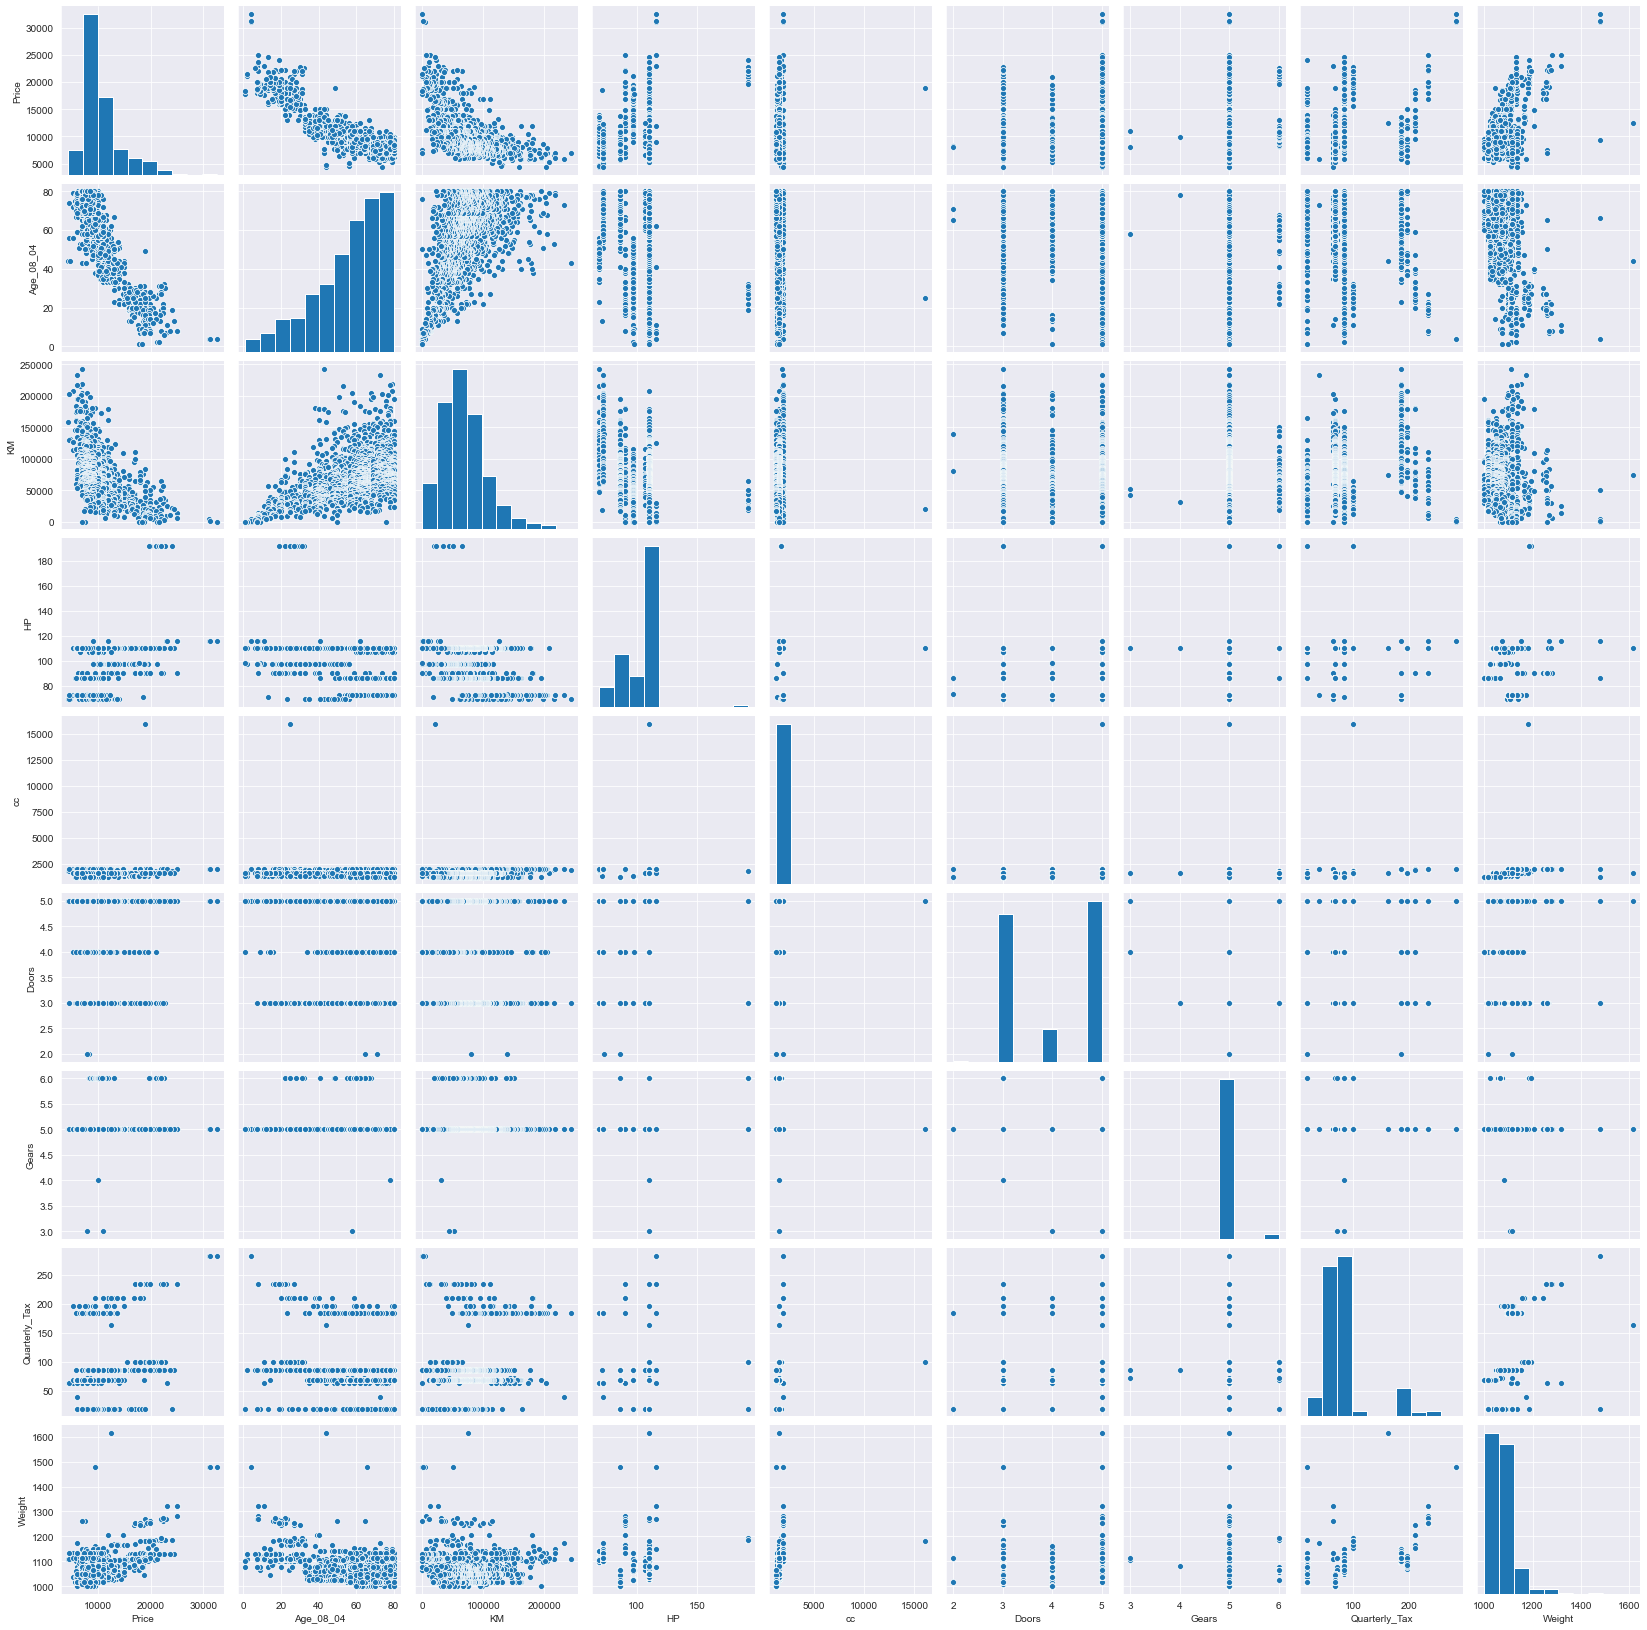

In [8]:
sns.pairplot(data)

In [9]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Model Building

In [12]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:31:51   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The pvalue of "cc" and "Doors" are very high.

Linear Regression

In [13]:
ml_cc = smf.ols("Price~cc",data=data).fit()
ml_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [15]:
ml_d = smf.ols("Price~Doors",data=data).fit()
ml_d.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [16]:
ml = smf.ols("Price~cc+Doors",data=data).fit()
ml.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

## Model Validation

### Variance Indflation Factor (VIF)

In [18]:
r_age = smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_age = 1/(1-r_age)

r_km = smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_km = 1/(1-r_km)

r_hp = smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_hp = 1/(1-r_hp)

r_cc = smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_cc = 1/(1-r_cc)

r_d = smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_d = 1/(1-r_d)

r_g = smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_g = 1/(1-r_g)

r_q = smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=data).fit().rsquared
vif_q = 1/(1-r_q)

r_w = r_age = smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=data).fit().rsquared
vif_w = 1/(1-r_w)

d = ({'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], \
      'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_q,vif_w]})
VIF = pd.DataFrame(d)
VIF

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


#### Residual analysis

Q-Q plot for normality checking of residuals

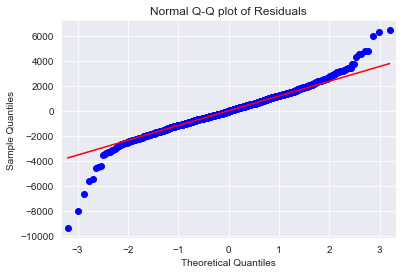

In [19]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [20]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 960], dtype=int64)]

In [21]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

#### Plot of error vs fitted values (e vs ycap)

In [22]:
def gets_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

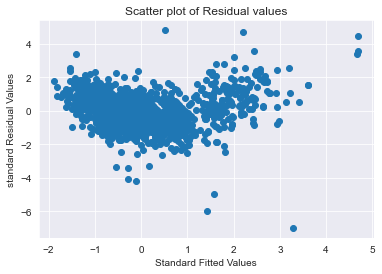

In [23]:
plt.scatter(gets_standardized_values(model.fittedvalues),gets_standardized_values(model.resid))
plt.title('Scatter plot of Residual values')
plt.xlabel('Standard Fitted Values')
plt.ylabel('standard Residual Values')
plt.show()

Plots of error vs regressors (e vs Xi)

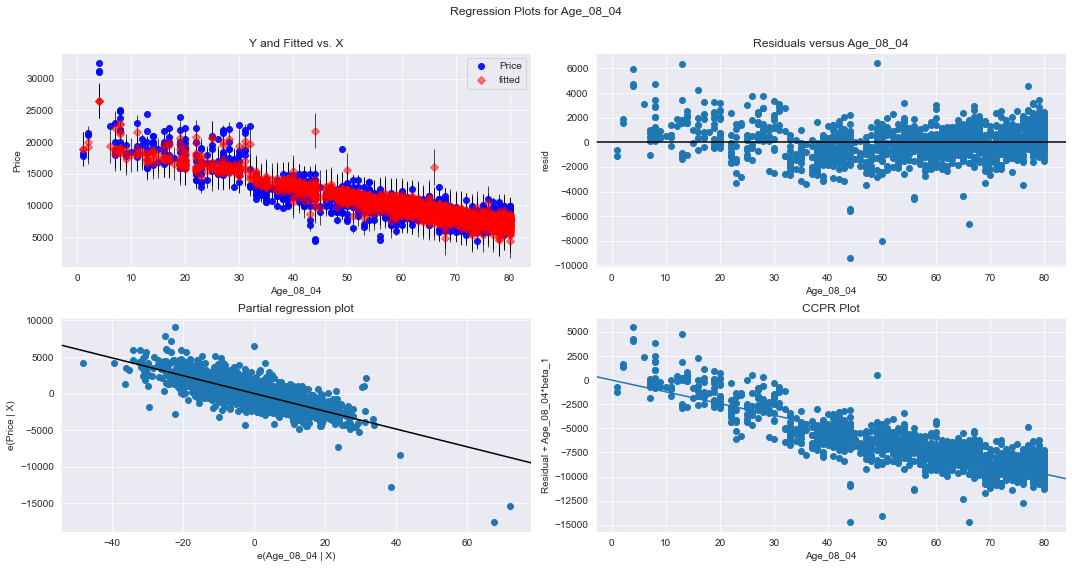

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

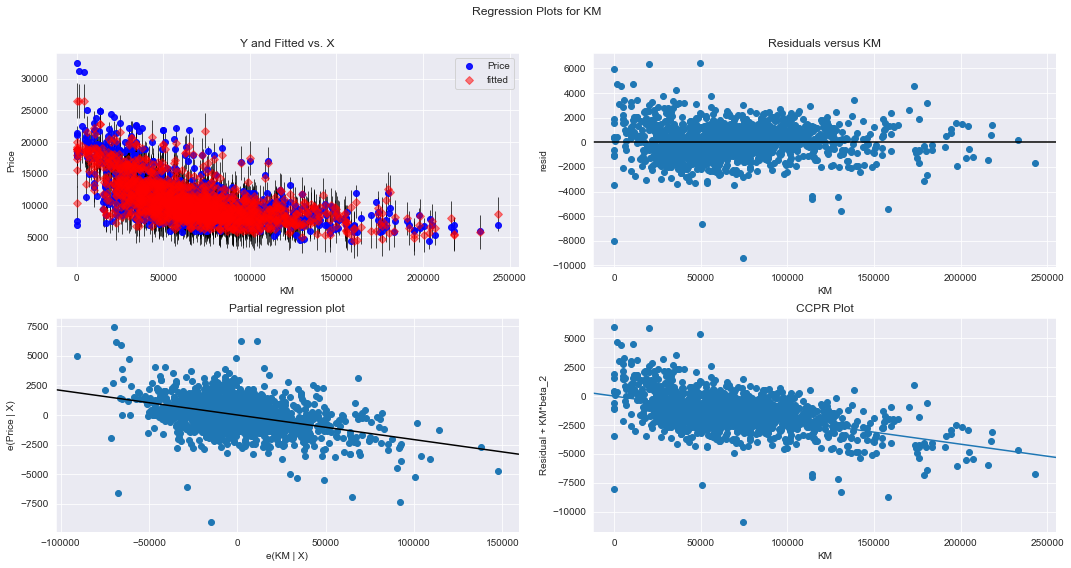

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

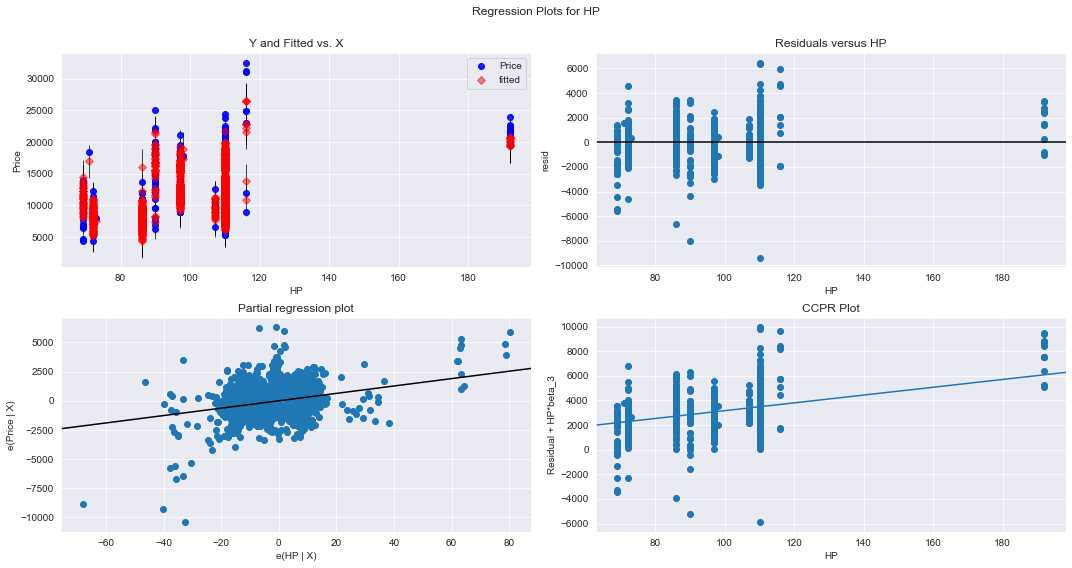

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

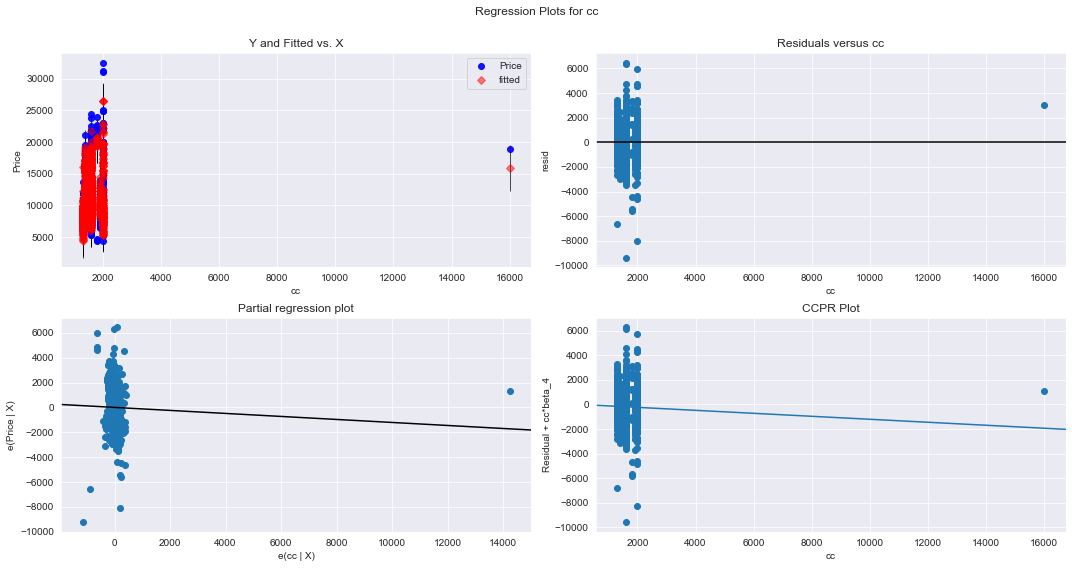

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

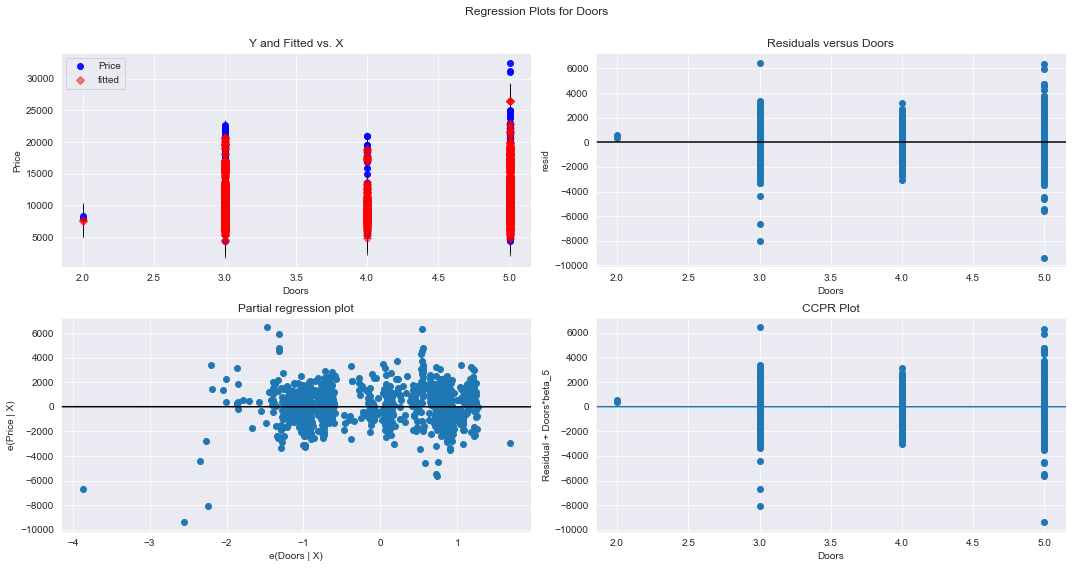

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

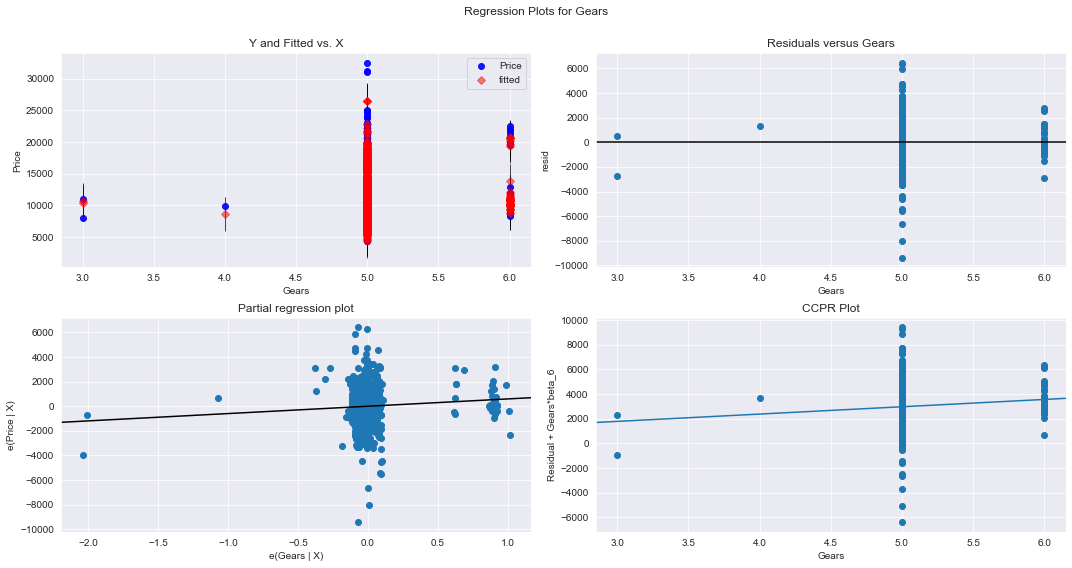

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

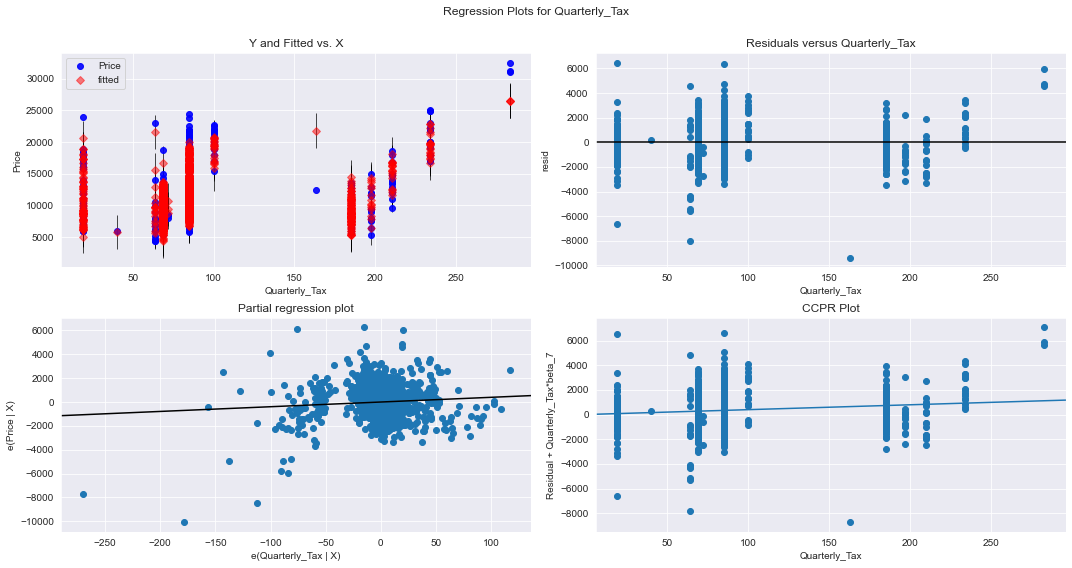

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

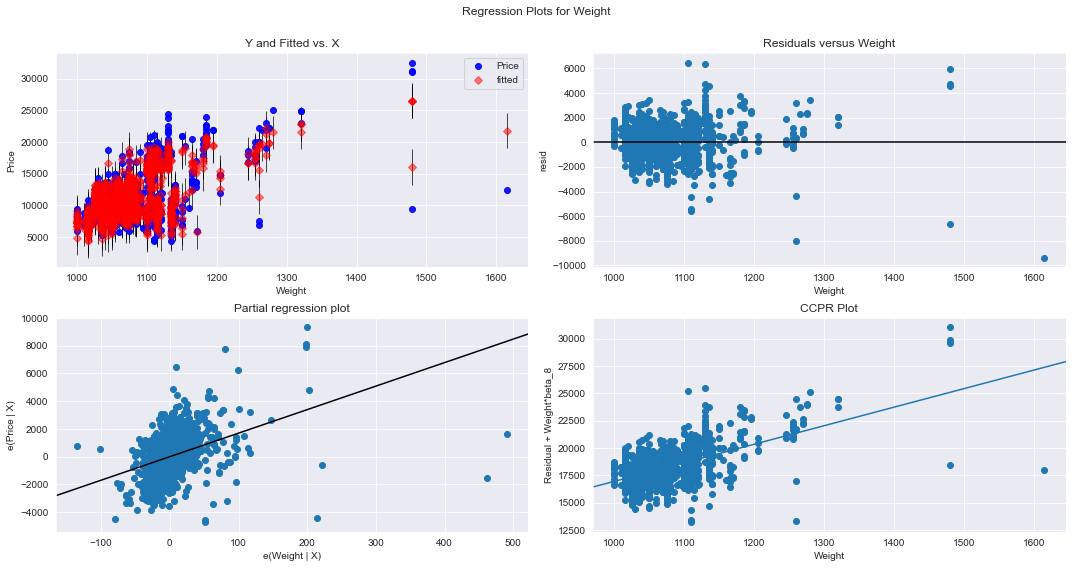

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnotics
### Detecting outliers/influencers
#### Cook's Distance

<ipython-input-32-1f919accda4a>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c,3))


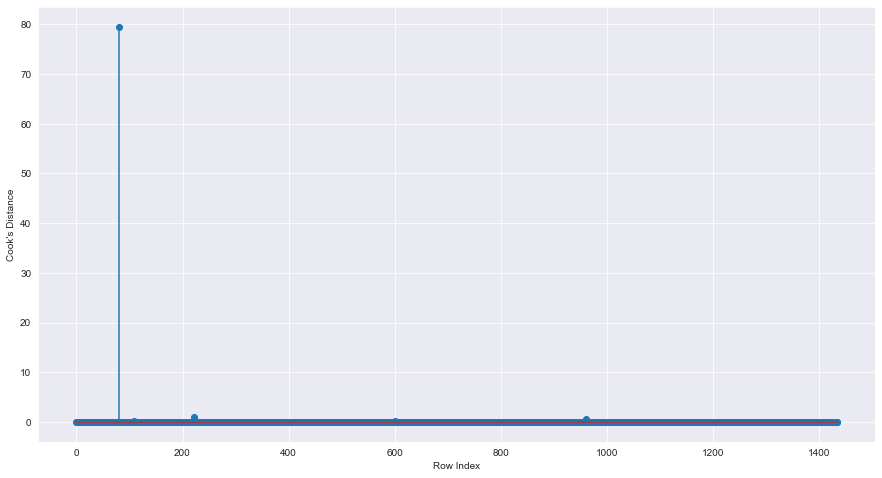

In [32]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

fig = plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(80, 79.5201062414142)

### High influence points

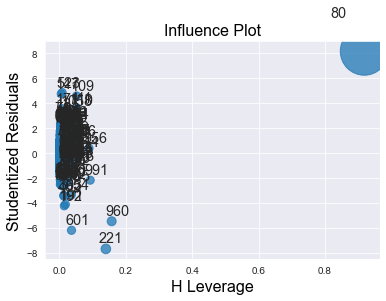

In [34]:
influence_plot(model)
plt.show()

### Eliminating the oulier

In [35]:
new_data = data.drop(data.index[[80]],axis=0).reset_index()
new_data = new_data.drop('index',axis=1)

#### New Model

In [48]:
model_cc = smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=new_data).fit()
(model_cc.rsquared,model_cc.aic)

(0.8693349475698542, 24685.765438793034)

In [49]:
model_doors = smf.ols("Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=new_data).fit()
(model_doors.rsquared,model_doors.aic)

(0.8631959819380925, 24751.649416173997)

#### model_cc has better r-squared and AIC values than model_doors

#### Cook's Distance

<ipython-input-50-76e4d431178f>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(new_data)),np.round(c_cc,3))


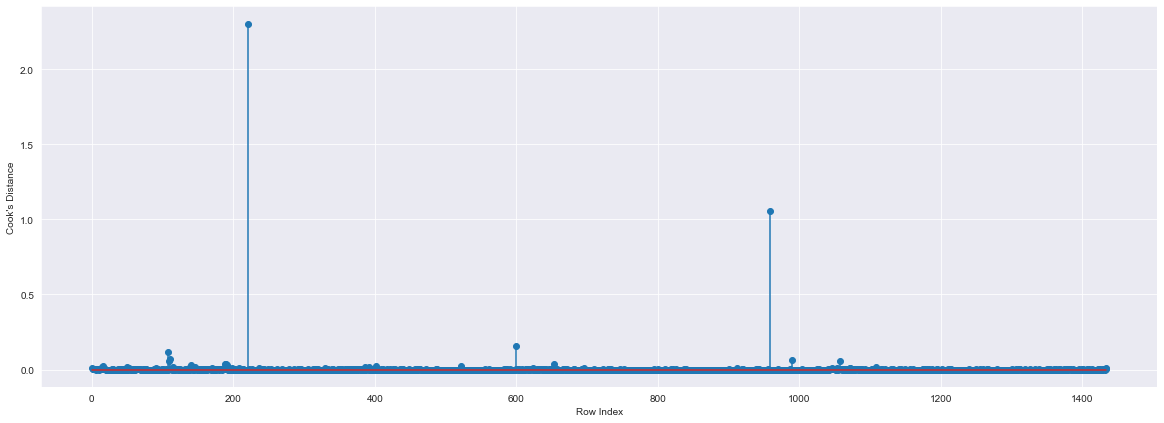

In [50]:
model_influence_cc = model_cc.get_influence()
(c_cc,_) = model_influence_cc.cooks_distance

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c_cc,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

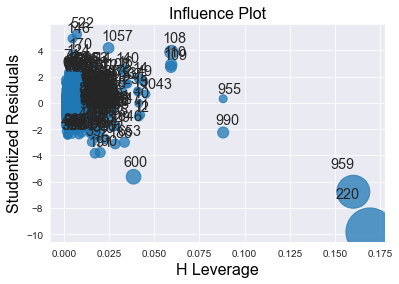

In [51]:
influence_plot(model_cc)
plt.show()

In [53]:
final_data = new_data.drop(new_data.index[[220,959]],axis=0).reset_index()
final_data = final_data.drop('index',axis=1)

In [54]:
final_model = smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=final_data).fit()

<ipython-input-55-e86faea69fdd>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(final_data)), np.round(c_cc,3))


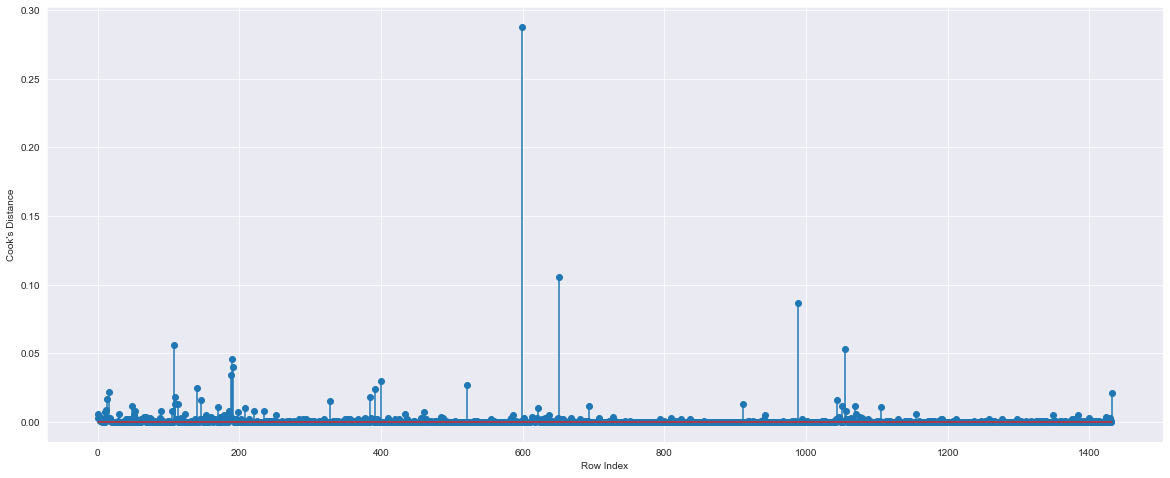

In [55]:
# Cook's Distance
model_influence = final_model.get_influence()
(c_cc,_) = model_influence.cooks_distance

fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(final_data)), np.round(c_cc,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

##### Check the prediction of the model

In [57]:
check_data = pd.DataFrame({'Age_08_04':20,'KM':50000,'HP':90,'cc':2000,'Doors':4,'Gears':5,'Quarterly_Tax':210,'Weight':1150},index=[1])
check_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,20,50000,90,2000,4,5,210,1150


In [58]:
final_model.predict(check_data)

1    16045.126121
dtype: float64